# Common project 

In [7]:
library(readxl)
library(tibble)
read_excel('../data/fatalities_workplace.xls') -> fatalities_workplace
fatalities_workplace<-column_to_rownames(fatalities_workplace, var = "name")

summary(fatalities_workplace)


   Fatalities      Accidents        Emergency      Pay_violations 
 Min.   : 1.00   Min.   :  5.00   Min.   : 4.900   Min.   :  4.0  
 1st Qu.: 6.00   1st Qu.: 29.00   1st Qu.: 6.600   1st Qu.: 35.0  
 Median :13.00   Median : 40.00   Median : 7.500   Median : 72.0  
 Mean   :17.47   Mean   : 61.91   Mean   : 7.647   Mean   :102.1  
 3rd Qu.:23.00   3rd Qu.: 77.00   3rd Qu.: 8.400   3rd Qu.:132.0  
 Max.   :69.00   Max.   :283.00   Max.   :12.600   Max.   :584.0  
 Law_violation     Wage_growth     Unemployment    
 Min.   :  25.0   Min.   : 87.0   Min.   : 0.3000  
 1st Qu.: 169.0   1st Qu.: 99.5   1st Qu.: 0.5000  
 Median : 270.0   Median :101.5   Median : 0.7000  
 Mean   : 365.9   Mean   :101.2   Mean   : 0.9963  
 3rd Qu.: 503.0   3rd Qu.:103.8   3rd Qu.: 0.9000  
 Max.   :1702.0   Max.   :109.4   Max.   :10.3000  

,Fatalities,Accidents,Emergency,Pay_violations,Law_violation,Wage_growth,Unemployment
Fatalities,1.0000000,0.9481794,-0.23652024,0.33085767,0.5001552,0.4147569,-0.23805638
Accidents,0.9481794,1.0000000,-0.21233397,0.30838502,0.5002988,0.4209829,-0.22488119
Emergency,-0.2365202,-0.2123340,1.00000000,-0.14848609,-0.1090177,-0.1638738,0.04999726
Pay_violations,0.3308577,0.3083850,-0.14848609,1.00000000,0.7238945,0.2388250,-0.09531847
Law_violation,0.5001552,0.5002988,-0.10901774,0.72389454,1.0000000,0.2707190,-0.10183264
Wage_growth,0.4147569,0.4209829,-0.16387376,0.23882497,0.2707190,1.0000000,-0.46382145
Unemployment,-0.2380564,-0.2248812,0.04999726,-0.09531847,-0.1018326,-0.4638214,1.00000000


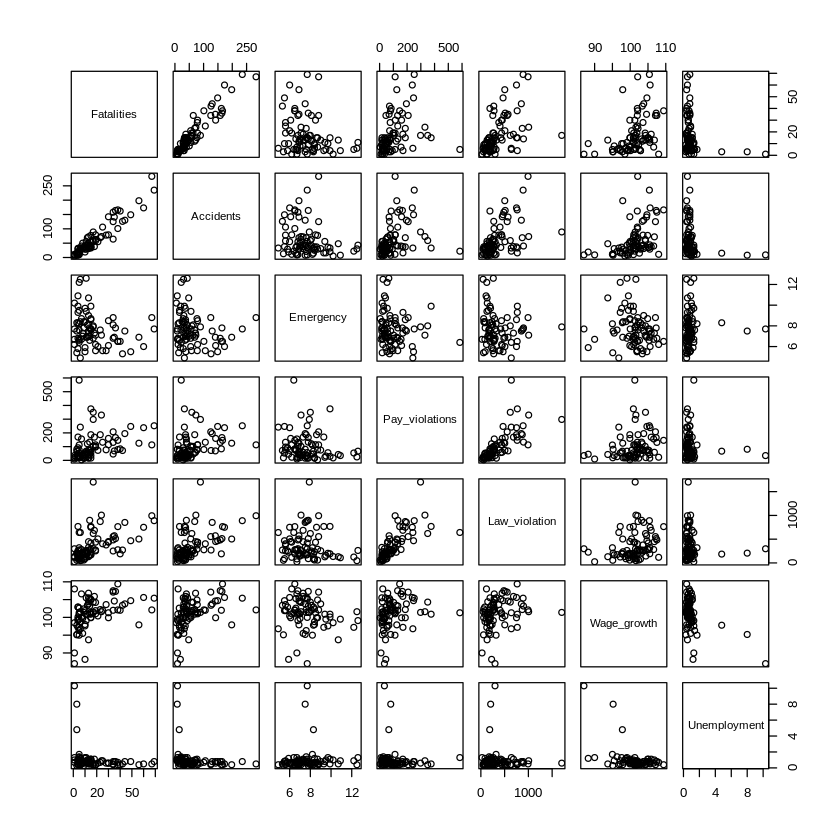

In [8]:
plot(fatalities_workplace)
cor(fatalities_workplace)

corrplot 0.95 loaded



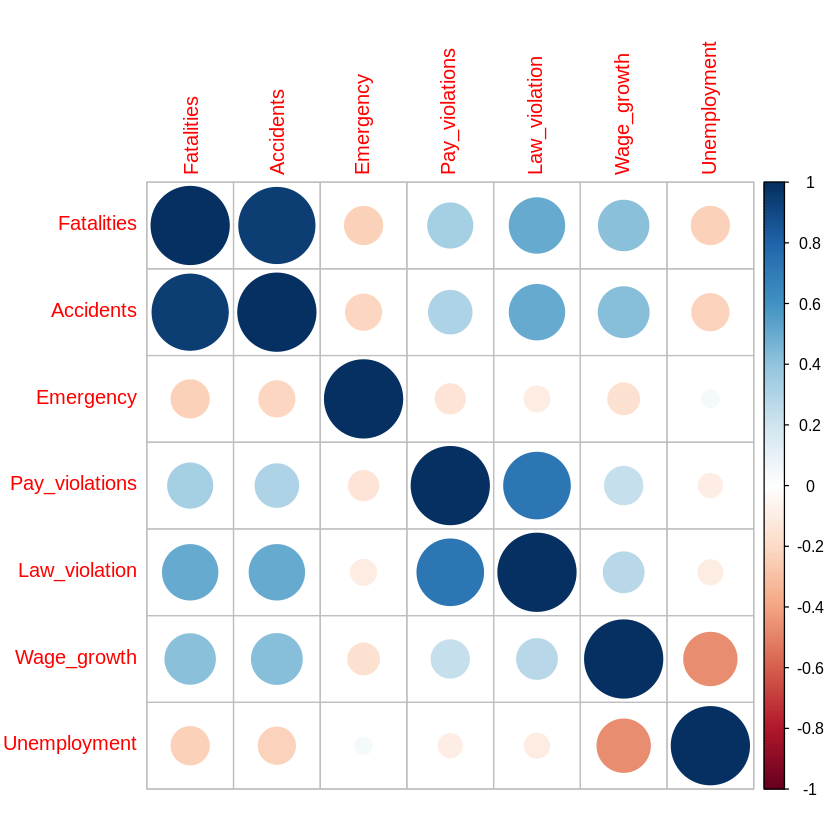

In [10]:
library(corrplot)
corrplot(cor(fatalities_workplace))


# Simple regression

model sr_ac Fatalities= 1.205138+0.262689*Accidents

interpretation: 
- b1=0.262689 - if Accidents increases by 1 unit, then the Fatalities will increase by 0.262689 unit in average (average probability that accident is fatality)
- b0=1.205138 - On average, 1.205138 people die in production (but it's not significant -> if someone dies, it's am accident)

In [11]:
sr_ac<-lm(Fatalities ~ Accidents, data = fatalities_workplace)
summary(sr_ac)


Call:
lm(formula = Fatalities ~ Accidents, data = fatalities_workplace)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7100 -2.9575 -0.6112  2.7619 15.9828 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.205138   0.826884   1.457    0.149    
Accidents   0.262689   0.009904  26.524   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.993 on 79 degrees of freedom
Multiple R-squared:  0.899,	Adjusted R-squared:  0.8978 
F-statistic: 703.5 on 1 and 79 DF,  p-value: < 2.2e-16


## Delete Intercept
model sr_ac Fatalities==0.273393*Accidents
interpretation: 
 
- b1=0.273393 - if Accidents increases by 1 unit, then the Fatalities will increase by 0.273384 unit in average (average probability that accident is fatality)

In [13]:
sr_ac<-lm(Fatalities ~ 0+Accidents, data = fatalities_workplace)

summary(sr_ac)



Call:
lm(formula = Fatalities ~ 0 + Accidents, data = fatalities_workplace)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3701  -2.0073   0.1579   3.1579  16.5029 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
Accidents 0.273393   0.006691   40.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.028 on 80 degrees of freedom
Multiple R-squared:  0.9543,	Adjusted R-squared:  0.9537 
F-statistic:  1670 on 1 and 80 DF,  p-value: < 2.2e-16


### Quality of the model

h0 b_i=0 (insignificant)

h1 b_i != 0 (significant)

-----------------------
#statistical significant of the model (fisher test)
#Multiple R-squared:  0.9543 -  variation of y by 95% is explained by variation of x
#h0: r^2=0 (model is insignificant)
#h1: r^2 != 0 (model is significant)
#p-value: < 2.2e-16 - significant of R -> significant of model in general

In [ ]:
library(MLmetrics)
MAPE(sr_ac$fitted.values, fatalities_workplace$Fatalities)*100
#31.27358 >10%




Attaching package: ‘MLmetrics’




The following object is masked from ‘package:base’:

    Recall




[1] 31.27358

#### Regression assumption

In [22]:
#3.4.1 expected value of error =0
#h0: E(e)=0
#h1: E(e) !=0
t.test(sr_ac$residuals, alternative = "t", conf.level = 0.95)
#  p-value = 0.3316 -> no reason to reject h0


	One Sample t-test

data:  sr_ac$residuals
t = 0.97676, df = 80, p-value = 0.3316
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.5627186  1.6475676
sample estimates:
mean of x 
0.5424245 


In [24]:
library('lmtest')
#3.4.2 homosckedastisity (lmtest library)
#h0: r(e, x)=0- homoske (variances are equal)
#h1:  r(e, x) !=0 - geteroskeda
gqtest(sr_ac, alternative = "t") #p-value = .3935-> no reason to reject h0 about homoskedastisity

Loading required package: zoo




Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Goldfeld-Quandt test

data:  sr_ac
GQ = 1.3156, df1 = 40, df2 = 39, p-value = 0.3935
alternative hypothesis: variance changes from segment 1 to 2


In [25]:
#3.4.3 autocorrelation (lmtest library)
#first order
#h0 r(e_i, e_{i+1})=0 - no autocorr for 1st order
#h1: r(e_i, e_{i+1}) !=0 - autocor for 1st order
dwtest(sr_ac) #p-value = 0.425 - no autocorr  pf 1st order

#k order (any)
#let k =3
#h0 r1=r2=r3=0 - no autocorr for 1st, 2nd, 3th order
#at least autocor coefficients not equal 0
bgtest(sr_ac, order=3) #p-value = 0.9267 - no autocor for 3



	Durbin-Watson test

data:  sr_ac
DW = 1.9433, p-value = 0.425
alternative hypothesis: true autocorrelation is greater than 0



	Breusch-Godfrey test for serial correlation of order up to 3

data:  sr_ac
LM test = 0.46399, df = 3, p-value = 0.9267



	Shapiro-Wilk normality test

data:  sr_ac$residuals
W = 0.98308, p-value = 0.3628


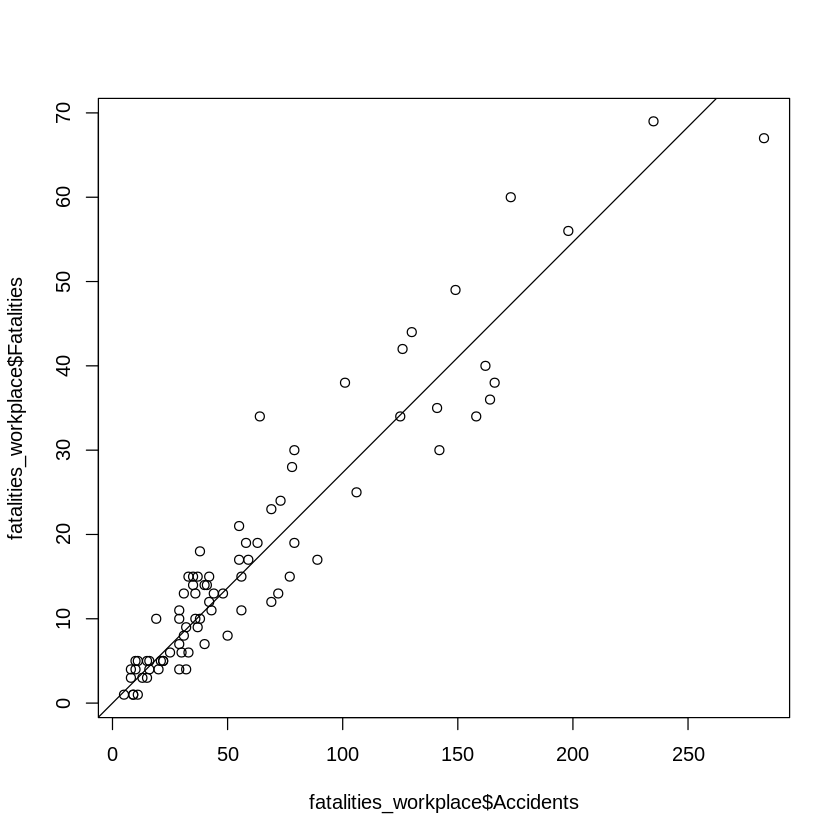

In [26]:
#3.4.4 #normality
shapiro.test(sr_ac$residuals) #p-value = 0.3628 -> there are no reasons to reject normality

plot(fatalities_workplace$Accidents, fatalities_workplace$Fatalities)
abline(sr_ac) 


# Multi-regression

Fatalities=-86.062305-1.420934*Emergency+0 021721*Law_violation+1.051984*Wage_growth

interpretation: 
- b0=-86.062305 On average, a person not only does not die, but also becomes healthier (ДМС)
- b1=-1.420934 - if Emergency increases by 1person per 10 thousands and other coefficients are fixed, then the Fatalities will decrease by 1.420934 fatality on average
- b2=0.021721 - if Law_violation increases by 1 unit and other coefficients are fixed, then the Fatalities will increase by 0.021721 on average
- b3=1.051984 -  if Wage_growth increases by 1 unit and other coefficients are fixed, then the Fatalities will increase by 1.051984 on average (sick pay increases with salary growth, people become less cautious)
----------------------------------------------
in general:  p-value: 2.001e-07  model is significant in general

Multiple R-squared:   0.355:  variation of y by 35% is explained by variation of Emergency,Law_violation and Wage_growth together

In [28]:
library('MASS')
#mr_ac<-lm(Fatalities ~ 0+ Accidents+Emergency+Pay_violations+Law_violation+Wage_growth+Unemployment, data = fatalities_workplace)
#only Accidents is significant, and if consider method 
#library MASS
mr_ac<-lm(Fatalities ~ Accidents+Emergency+Pay_violations+Law_violation+Wage_growth+Unemployment, data = fatalities_workplace)
mr_ac<-stepAIC(mr_ac, direction = "both")
#Fatalities ~ Accidents - we have case of simple regression - already consider

Start:  AIC=269.76
Fatalities ~ Accidents + Emergency + Pay_violations + Law_violation + 
    Wage_growth + Unemployment

                 Df Sum of Sq     RSS    AIC
- Wage_growth     1       0.0  1904.4 267.76
- Law_violation   1       0.8  1905.2 267.79
- Pay_violations  1       9.4  1913.8 268.16
- Unemployment    1       9.9  1914.3 268.18
- Emergency       1      21.1  1925.5 268.65
<none>                         1904.4 269.76
- Accidents       1   10470.0 12374.4 419.34

Step:  AIC=267.76
Fatalities ~ Accidents + Emergency + Pay_violations + Law_violation + 
    Unemployment

                 Df Sum of Sq     RSS    AIC
- Law_violation   1       0.8  1905.2 265.79
- Pay_violations  1       9.5  1913.9 266.16
- Unemployment    1      11.8  1916.2 266.26
- Emergency       1      21.2  1925.6 266.65
<none>                         1904.4 267.76
+ Wage_growth     1       0.0  1904.4 269.76
- Accidents       1   11335.7 13240.1 422.82

Step:  AIC=265.79
Fatalities ~ Accidents + Emerge

In [30]:
mr_wac<-lm(Fatalities ~Emergency+Pay_violations+Law_violation+Wage_growth+Unemployment, data = fatalities_workplace)
summary(mr_wac)
#Law_violation, Wage_growth significant with 0.05



Call:
lm(formula = Fatalities ~ Emergency + Pay_violations + Law_violation + 
    Wage_growth + Unemployment, data = fatalities_workplace)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.992  -7.397  -2.368   4.093  36.802 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -72.22258   42.84621  -1.686 0.096025 .  
Emergency       -1.51210    0.91337  -1.656 0.102000    
Pay_violations  -0.01787    0.02102  -0.850 0.397870    
Law_violation    0.02611    0.00717   3.641 0.000497 ***
Wage_growth      0.93248    0.40708   2.291 0.024792 *  
Unemployment    -0.83365    1.14035  -0.731 0.467030    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.84 on 75 degrees of freedom
Multiple R-squared:  0.3656,	Adjusted R-squared:  0.3233 
F-statistic: 8.645 on 5 and 75 DF,  p-value: 1.661e-06


In [31]:
mr_wac<-stepAIC(mr_wac, direction = "both") #Fatalities ~ Emergency + Law_violation + Wage_growth
summary(mr_wac)

Start:  AIC=419.34
Fatalities ~ Emergency + Pay_violations + Law_violation + Wage_growth + 
    Unemployment

                 Df Sum of Sq   RSS    AIC
- Unemployment    1     88.18 12462 417.92
- Pay_violations  1    119.29 12494 418.12
<none>                        12374 419.34
- Emergency       1    452.19 12827 420.25
- Wage_growth     1    865.75 13240 422.82
- Law_violation   1   2187.12 14562 430.53

Step:  AIC=417.92
Fatalities ~ Emergency + Pay_violations + Law_violation + Wage_growth

                 Df Sum of Sq   RSS    AIC
- Pay_violations  1    118.27 12581 416.68
<none>                        12462 417.92
- Emergency       1    441.32 12904 418.74
+ Unemployment    1     88.18 12374 419.34
- Wage_growth     1   1429.99 13892 424.72
- Law_violation   1   2168.98 14632 428.92

Step:  AIC=416.68
Fatalities ~ Emergency + Law_violation + Wage_growth

                 Df Sum of Sq   RSS    AIC
<none>                        12581 416.68
- Emergency       1    403.16 12984 417


Call:
lm(formula = Fatalities ~ Emergency + Law_violation + Wage_growth, 
    data = fatalities_workplace)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.352  -7.393  -1.870   3.452  37.952 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -86.062305  37.697495  -2.283  0.02519 *  
Emergency      -1.420934   0.904578  -1.571  0.12032    
Law_violation   0.021721   0.005069   4.285 5.22e-05 ***
Wage_growth     1.051984   0.360419   2.919  0.00461 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.78 on 77 degrees of freedom
Multiple R-squared:  0.355,	Adjusted R-squared:  0.3299 
F-statistic: 14.13 on 3 and 77 DF,  p-value: 2.001e-07


In [32]:
MAPE(mr_wac$fitted.values, fatalities_workplace$Fatalities)*100 #104.669>31%


[1] 104.669

## Regression assimption

In [33]:
#3.4.1 expected value of error =0
#h0: E(e)=0
#h1: E(e) !=0
t.test(mr_wac$residuals, alternative = "t", conf.level = 0.95)
# p-value = 1 -> no reason to reject h0


	One Sample t-test

data:  mr_wac$residuals
t = 1.482e-16, df = 80, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.772897  2.772897
sample estimates:
   mean of x 
2.065004e-16 


In [34]:

#3.4.2 homosckedastisity (lmtest library)
#h0: r(e, x)=0- homoske (variances are equal)
#h1:  r(e, x) !=0 - geteroskeda
gqtest(mr_wac, alternative = "t") # p-value = 0.7316 -> no reason to reject h0 about homoskedastisity
bptest(mr_wac, studentize = FALSE)# p-value =7.014e-08->  reject h0 about homoskedastisity !!!!!


	Goldfeld-Quandt test

data:  mr_wac
GQ = 0.89242, df1 = 37, df2 = 36, p-value = 0.7316
alternative hypothesis: variance changes from segment 1 to 2



	Breusch-Pagan test

data:  mr_wac
BP = 36.134, df = 3, p-value = 7.014e-08



	Durbin-Watson test

data:  mr_wac
DW = 2.1072, p-value = 0.6556
alternative hypothesis: true autocorrelation is greater than 0



	Breusch-Godfrey test for serial correlation of order up to 4

data:  mr_wac
LM test = 1.9931, df = 4, p-value = 0.737


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 7.5133, df = 10, p-value = 0.6763


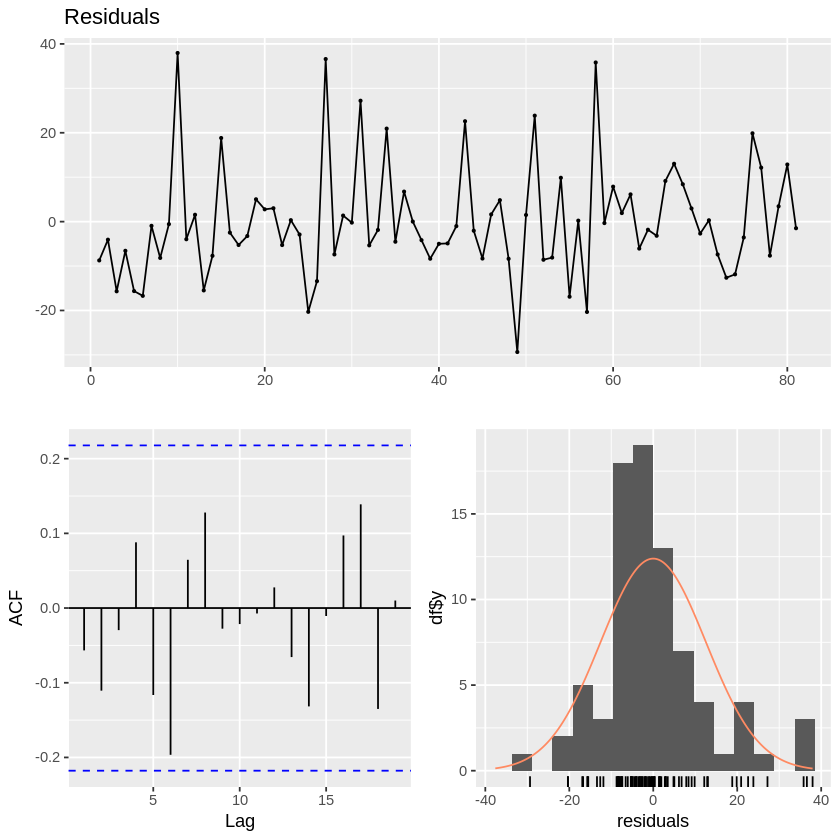

In [37]:
#3.4.3 autocorrelation (lmtest library)
#first order
#h0 r(e_i, e_{i+1})=0 - no autocorr for 1st order
#r(e_i, e_{i+1}) !=0 - auto cor for 1st order
dwtest(mr_wac) #-value =  0.6556- no autocorr  of 1st order
#k order (any)
#let k =4
#h0 r1=r2=r3==r40 - no autocorr for 1st, 2nd, 3th, 4th order
#at least autocor coefficients not equal 0
bgtest(mr_wac, order=4) #p-value =  0.737 - no autocor untill 4th

library(forecast)
checkresiduals(mr_wac) # help to check all assumtion


Warning message:
“package ‘car’ was built under R version 4.3.3”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 4.3.3”


Emergency Law_violation   Wage_growth 
     1.032381      1.084110      1.100787


	Shapiro-Wilk normality test

data:  mr_wac$residuals
W = 0.92473, p-value = 0.0001455


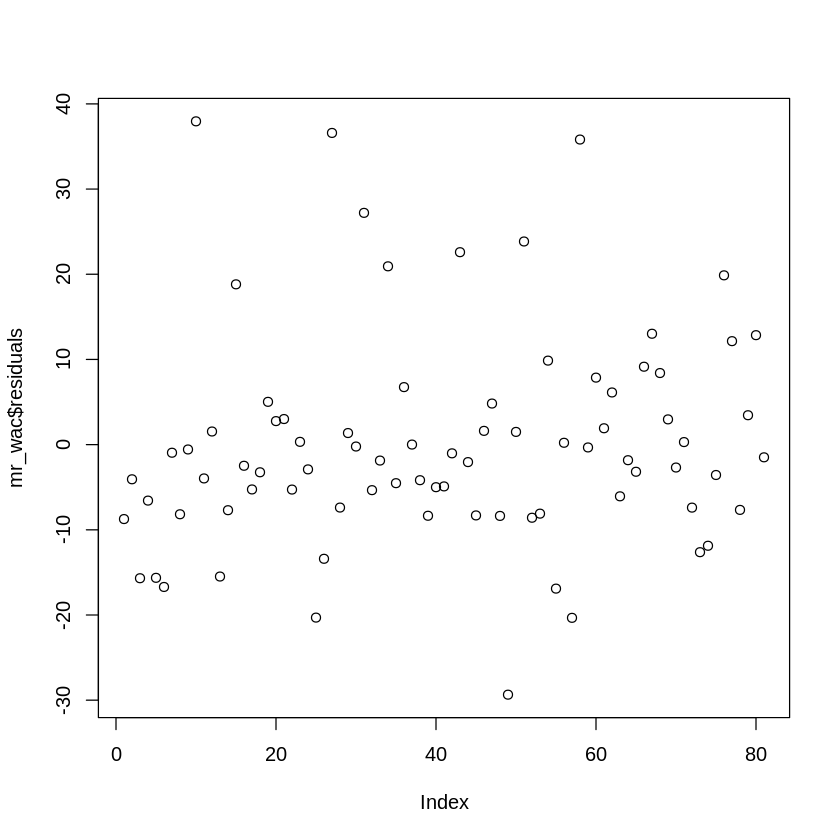

In [39]:
#multicollinearity (1. pure:signal if coef 0 and 1. 2. partial: problem with sign)
library(car)
vif(mr_wac) #
#Emergency Law_violation   Wage_growth 
#1.032381      1.084110      1.100787   - very good - no multicor
#3.4.4 #normality
shapiro.test(mr_wac$residuals) #p-value =  0.0001455  - no normality


plot(mr_wac$residuals)

# Additionally

Start:  AIC=267.81
Fatalities ~ 0 + Accidents + Emergency + Pay_violations + Law_violation + 
    Wage_growth + Unemployment

                 Df Sum of Sq     RSS    AIC
- Law_violation   1       0.7  1906.5 265.85
- Unemployment    1       8.6  1914.4 266.18
- Pay_violations  1       9.1  1914.9 266.20
- Emergency       1      19.7  1925.5 266.65
- Wage_growth     1      35.7  1941.5 267.32
<none>                         1905.8 267.81
- Accidents       1   10937.4 12843.2 420.36

Step:  AIC=265.85
Fatalities ~ Accidents + Emergency + Pay_violations + Wage_growth + 
    Unemployment - 1

                 Df Sum of Sq     RSS    AIC
- Unemployment    1       8.4  1914.9 264.20
- Emergency       1      19.2  1925.7 264.66
- Pay_violations  1      25.2  1931.7 264.91
- Wage_growth     1      35.6  1942.2 265.35
<none>                         1906.5 265.85
+ Law_violation   1       0.7  1905.8 267.81
- Accidents       1   13390.0 15296.5 432.52

Step:  AIC=264.2
Fatalities ~ Accidents + E


Call:
lm(formula = Fatalities ~ Accidents + Pay_violations - 1, data = fatalities_workplace)

Residuals:
   Min     1Q Median     3Q    Max 
-9.044 -2.118 -0.015  2.996 16.746 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
Accidents      0.263301   0.008985  29.305   <2e-16 ***
Pay_violations 0.008758   0.005273   1.661    0.101    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.973 on 79 degrees of freedom
Multiple R-squared:  0.9558,	Adjusted R-squared:  0.9547 
F-statistic: 854.5 on 2 and 79 DF,  p-value: < 2.2e-16


[1] 32.75117


	One Sample t-test

data:  mr_ac$residuals
t = 0.49806, df = 80, p-value = 0.6198
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.8180327  1.3641831
sample estimates:
mean of x 
0.2730752 



	Goldfeld-Quandt test

data:  mr_ac
GQ = 1.3275, df1 = 39, df2 = 38, p-value = 0.3844
alternative hypothesis: variance changes from segment 1 to 2



	Breusch-Pagan test

data:  mr_ac
BP = 10.584, df = 1, p-value = 0.00114


Warning message in dwtest(mr_ac):
“exact p value cannot be computed (not in [0,1]), approximate p value will be used”



	Durbin-Watson test

data:  mr_ac
DW = 1.9752, p-value = 0.4711
alternative hypothesis: true autocorrelation is greater than 0



	Breusch-Godfrey test for serial correlation of order up to 4

data:  mr_ac
LM test = 1.2395, df = 4, p-value = 0.8715



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 8.1558, df = 10, p-value = 0.6136


Warning message in vif.default(mr_ac):
“No intercept: vifs may not be sensible.”


Accidents Pay_violations 
      1.842824       1.842824


	Shapiro-Wilk normality test

data:  mr_ac$residuals
W = 0.9749, p-value = 0.1122


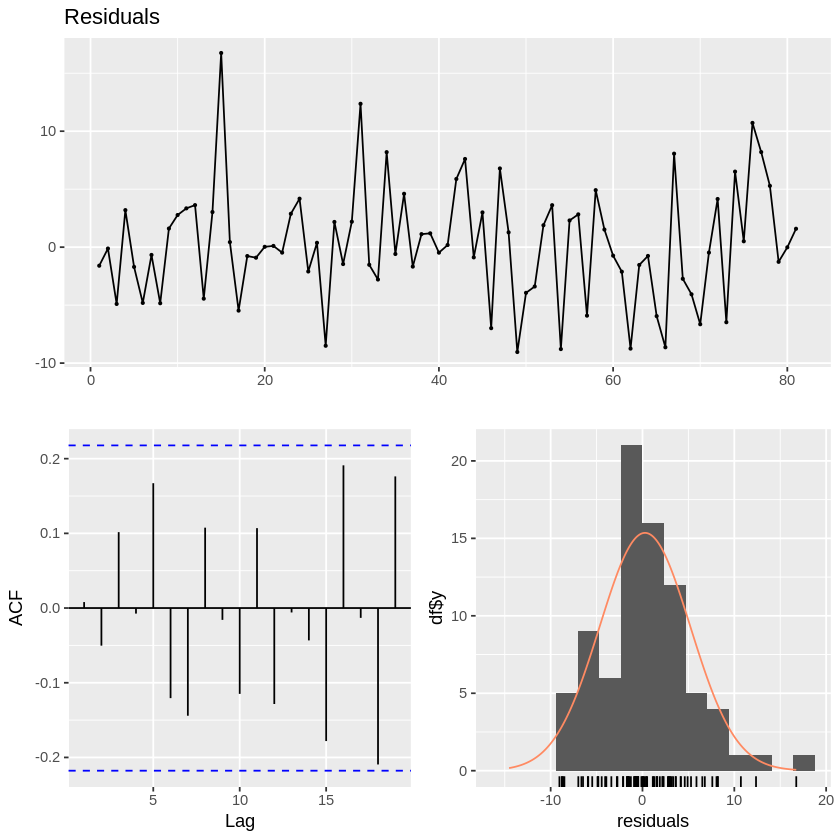

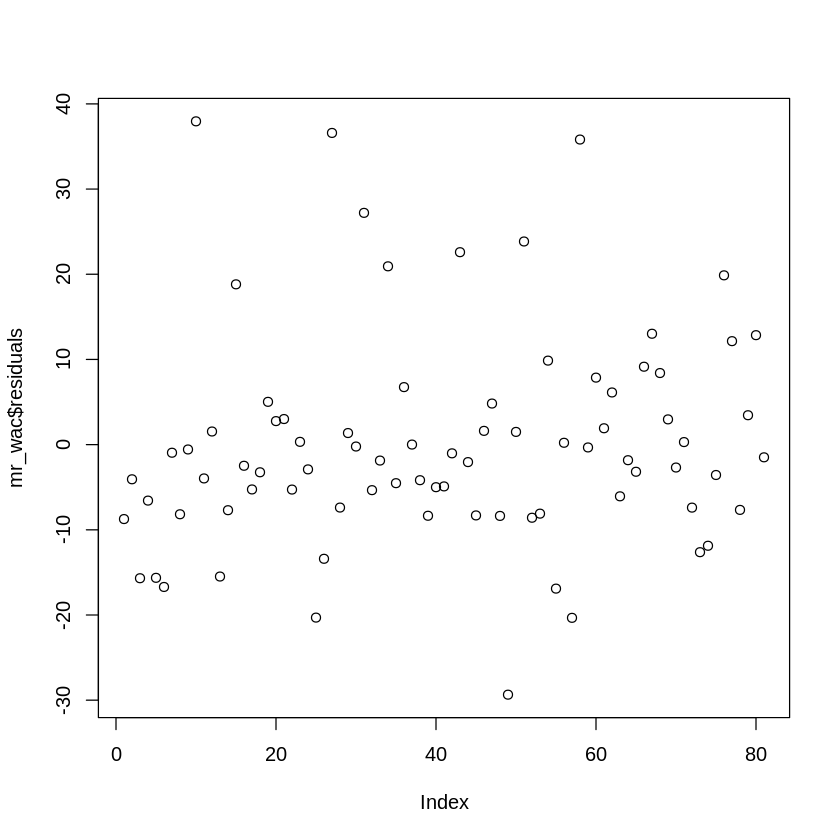

In [44]:
# Additionally


mr_ac<-lm(Fatalities ~0+ Accidents+Emergency+Pay_violations+Law_violation+Wage_growth+Unemployment, data = fatalities_workplace)
mr_ac<-stepAIC(mr_ac, direction = "both")
summary(mr_ac)

#Multiple R-squared:  0.9558:  variation of y by 95% is explained by variation of Accidents and Pay_violations together

#Adjusted R-squared:  0.9542 for sr_ac
#Adjusted R-squared:  0.9547 for mr_ac
#0.9542-0.9547=0.005<0.05 we don't recommend to add factor Pay_violations to the model m1(Fatalities~Accidents)

MAPE(mr_ac$fitted.values, fatalities_workplace$Fatalities)*100
 #32.75117 >10%-> not good mpdel - first model is better

#3.4 regression assimption
#3.4.1 expected value of error =0
#h0: E(e)=0
#h1: E(e) !=0
t.test(mr_ac$residuals, alternative = "t", conf.level = 0.95)
# p-value = 0.6198 -> no reason to reject h0

#3.4.2 homosckedastisity (lmtest library)

#h0: r(e, x)=0- homoske (variances are equal)
#h1:  r(e, x) !=0 - geteroskeda
gqtest(mr_ac, alternative = "t") # p-value =0.3844 -> no reason to reject h0 about homoskedastisity
bptest(mr_ac, studentize = FALSE)# p-value =0.00114->  reject h0 about homoskedastisity !!!!!

#3.4.3 autocorrelation (lmtest library)
#first order
#h0 r(e_i, e_{i+1})=0 - no autocorr for 1st order
#r(e_i, e_{i+1}) !=0 - auto cor for 1st order
dwtest(mr_ac) #-value =  0.4711- no autocorr  of 1st order
#k order (any)
#let k =4
#h0 r1=r2=r3==r40 - no autocorr for 1st, 2nd, 3th, 4th order
#at least autocor coefficients not equal 0
bgtest(mr_ac, order=4) #p-value = 0.8715- no autocor untill 4th

#forecast - library
checkresiduals(mr_ac) # help to check all assumption


#multicollinearity (1. pure:signal if coef 0 and 1. 2. partial: problem with sign)
vif(mr_ac) #library car
#  Accidents Pay_violations 
#1.842824       1.842824  - very good - no multicor
#3.4.4 #normality
shapiro.test(mr_ac$residuals) #p-value =  0.1122  - normality


plot(mr_wac$residuals)

#Conclusion: simple regression is the best, but we have problem with MAPE





Call:
lm(formula = log(Fatalities) ~ ., data = fatalities_workplace)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03513 -0.18754  0.07035  0.37355  1.01650 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.8327506  1.8252438  -0.456  0.64955    
Accidents       0.0114200  0.0013309   8.581 1.03e-12 ***
Emergency      -0.0215527  0.0384714  -0.560  0.57702    
Pay_violations  0.0001544  0.0008820   0.175  0.86149    
Law_violation   0.0003207  0.0003266   0.982  0.32940    
Wage_growth     0.0271179  0.0176135   1.540  0.12792    
Unemployment   -0.1346127  0.0474988  -2.834  0.00592 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.534 on 74 degrees of freedom
Multiple R-squared:  0.727,	Adjusted R-squared:  0.7049 
F-statistic: 32.84 on 6 and 74 DF,  p-value: < 2.2e-16


Start:  AIC=-94.94
log(Fatalities) ~ Accidents + Emergency + Pay_violations + Law_violation + 
    Wage_growth + Unemployment



                 Df Sum of Sq    RSS     AIC
- Pay_violations  1    0.0087 21.113 -96.909
- Emergency       1    0.0895 21.194 -96.600
- Law_violation   1    0.2749 21.379 -95.895
<none>                        21.104 -94.943
- Wage_growth     1    0.6760 21.780 -94.389
- Unemployment    1    2.2906 23.395 -88.597
- Accidents       1   20.9977 42.102 -41.003

Step:  AIC=-96.91
log(Fatalities) ~ Accidents + Emergency + Law_violation + Wage_growth + 
    Unemployment

                 Df Sum of Sq    RSS     AIC
- Emergency       1    0.0972 21.210 -98.537
<none>                        21.113 -96.909
- Law_violation   1    0.6652 21.778 -96.397
- Wage_growth     1    0.6925 21.805 -96.295
+ Pay_violations  1    0.0087 21.104 -94.943
- Unemployment    1    2.2947 23.408 -90.552
- Accidents       1   21.2736 42.387 -42.457

Step:  AIC=-98.54
log(Fatalities) ~ Accidents + Law_violation + Wage_growth + Unemployment

                 Df Sum of Sq    RSS     AIC
<none>                        21


Call:
lm(formula = log(Fatalities) ~ Accidents + Law_violation + Wage_growth + 
    Unemployment, data = fatalities_workplace)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01014 -0.27039  0.05364  0.35165  1.00186 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.1214312  1.7430239  -0.643  0.52191    
Accidents      0.0115016  0.0012902   8.915 1.94e-13 ***
Law_violation  0.0003595  0.0002333   1.541  0.12748    
Wage_growth    0.0282984  0.0172969   1.636  0.10597    
Unemployment  -0.1337142  0.0469520  -2.848  0.00566 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5283 on 76 degrees of freedom
Multiple R-squared:  0.7256,	Adjusted R-squared:  0.7112 
F-statistic: 50.25 on 4 and 76 DF,  p-value: < 2.2e-16


[1] 78.24511


Call:
lm(formula = log(Fatalities) ~ Accidents + Unemployment, data = fatalities_workplace)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83241 -0.26543  0.03125  0.37944  0.96452 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.80341    0.10701  16.853  < 2e-16 ***
Accidents     0.01314    0.00110  11.949  < 2e-16 ***
Unemployment -0.16506    0.04357  -3.788 0.000297 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5402 on 78 degrees of freedom
Multiple R-squared:  0.7056,	Adjusted R-squared:  0.698 
F-statistic: 93.47 on 2 and 78 DF,  p-value: < 2.2e-16


[1] 51.48054

Белгородская область 
                                                 -4.66246674 
                                            Брянская область 
                                                 -2.45272692 
                                        Владимирская область 
                                                  2.29963944 
                                         Воронежская область 
                                                 -9.60971692 
                                          Ивановская область 
                                                  2.89724334 
                                           Калужская область 
                                                  2.76710666 
                                         Костромская область 
                                                  1.18203950 
                                             Курская область 
                                                  4.65266068 
                                            Липецкая область 
                                                 -5.29417930 
                                          Московская область 
                                                 20.63869862 
                                           Орловская область 
                                                 -4.17652535 
                                           Рязанская область 
                                                 -5.45272692 
                                          Смоленская область 
                                                  3.91635155 
                                          Тамбовская область 
                                                 -6.37641119 
                                            Тверская область 
                                                -21.04035300 
                                            Тульская область 
                                                 -0.20333764 
                                         Ярославская область 
                                                  2.43191482 
                                          Республика Карелия 
                                                  1.34884005 
                                             Республика Коми 
                                                 -2.38196580 
                                       Архангельская область 
                                                 -2.13928785 
                                         Вологодская область 
                                                 -4.07887858 
                                     Калининградская область 
                                                 -1.23571732 
                                       Ленинградская область 
                                                 -6.82352114 
                                          Мурманская область 
                                                 -5.00589117 
                                        Новгородская область 
                                                  5.24893437 
                                           Псковская область 
                                                  1.69577238 
                                          г. Санкт-Петербург 
                                                163.32566313 
                                           Республика Адыгея 
                                                  1.06640074 
                                         Республика Калмыкия 
                                                  4.51293954 
                                             Республика Крым 
                                                 -2.08364845 
                                          Краснодарский край 
                                                 -5.72317405 
                                        Астраханская область 
                                                  2.58404087 
                                       Волгоградская область 
          


	One Sample t-test

data:  res
t = 0.39615, df = 80, p-value = 0.6931
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.568687  5.342587
sample estimates:
mean of x 
  0.88695 



	Shapiro-Wilk normality test

data:  res
W = 0.38867, p-value < 2.2e-16


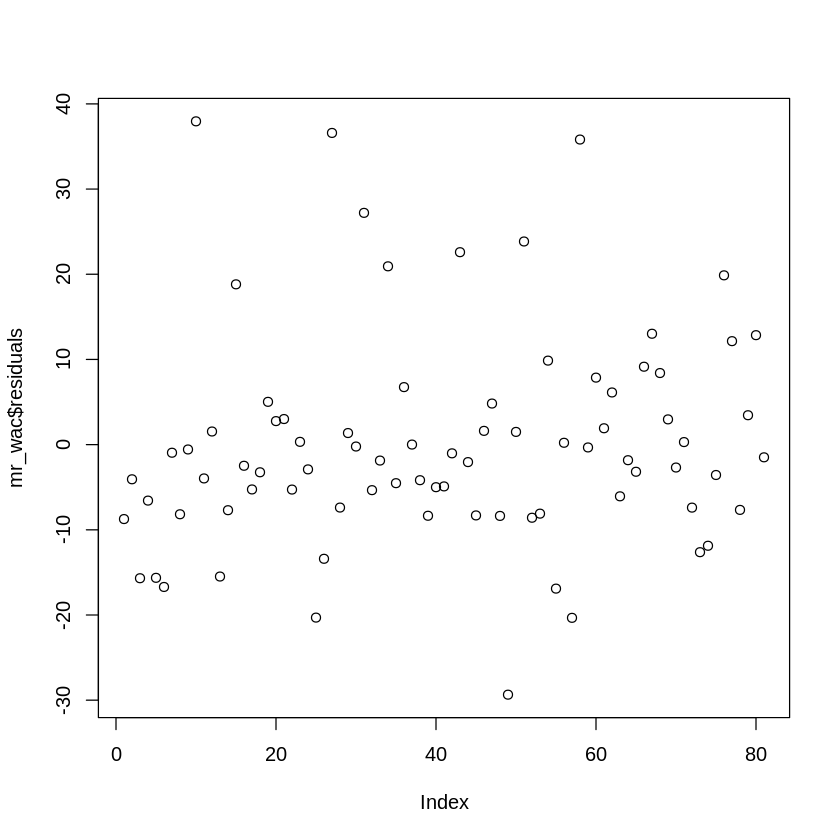

[1] 66


Call:
lm(formula = Fatalities^lambda ~ ., data = fatalities_workplace)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3774 -0.7284 -0.0473  0.7316  3.5252 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.2335604  3.8800677  -0.060    0.952    
Accidents       0.0473771  0.0028292  16.746   <2e-16 ***
Emergency      -0.0875692  0.0817817  -1.071    0.288    
Pay_violations  0.0006736  0.0018750   0.359    0.720    
Law_violation   0.0004815  0.0006943   0.693    0.490    
Wage_growth     0.0334750  0.0374425   0.894    0.374    
Unemployment   -0.1586283  0.1009720  -1.571    0.120    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.135 on 74 degrees of freedom
Multiple R-squared:  0.8778,	Adjusted R-squared:  0.8679 
F-statistic: 88.57 on 6 and 74 DF,  p-value: < 2.2e-16


[1] 41.52462


Call:
lm(formula = Fatalities ~ Accidents + Wage_growth^2, data = fatalities_workplace)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9465 -2.9064 -0.4393  2.7029 15.9297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.85451   14.77949  -0.396    0.693    
Accidents    0.26048    0.01097  23.740   <2e-16 ***
Wage_growth  0.07112    0.14865   0.478    0.634    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.017 on 78 degrees of freedom
Multiple R-squared:  0.8993,	Adjusted R-squared:  0.8968 
F-statistic: 348.4 on 2 and 78 DF,  p-value: < 2.2e-16


[1] 0.3657348

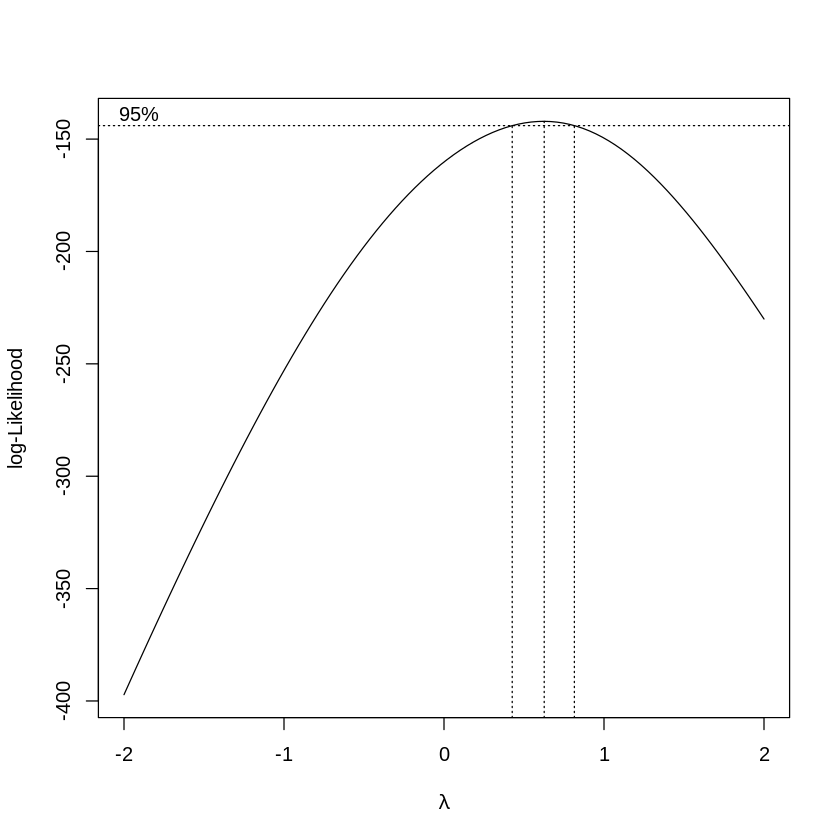

In [46]:

log_ac<-lm(log(Fatalities)~., data=fatalities_workplace)
summary(log_ac)
#                 Estimate Std. Error t value Pr(>|t|)    
#(Intercept)    -0.8327506  1.8252438  -0.456  0.64955    
#Accidents       0.0114200  0.0013309   8.581 1.03e-12 ***
#  Emergency      -0.0215527  0.0384714  -0.560  0.57702    
#Pay_violations  0.0001544  0.0008820   0.175  0.86149    
#Law_violation   0.0003207  0.0003266   0.982  0.32940    
#Wage_growth     0.0271179  0.0176135   1.540  0.12792    
#Unemployment   -0.1346127  0.0474988  -2.834  0.00592 ** 

log_ac<-stepAIC(log_ac, direction = "both")
summary(log_ac)

MAPE(log_ac$fitted.values, fatalities_workplace$Fatalities)*100 #49.07956
log_ac<-lm(log(Fatalities)~Accidents+Unemployment, data=fatalities_workplace) 
summary(log_ac)
MAPE(exp(log_ac$fitted.values), fatalities_workplace$Fatalities)*100 #51.48054
res<-exp(log_ac$fitted.values)-fatalities_workplace$Fatalities
res
#3.4.1 expected value of error =0
t.test(res, alternative = "t", conf.level = 0.95)
# p-value = 0.6931 -> no reason to reject h0
#3.4.4 #normality
shapiro.test(res) #p-value =  2.2e-16  - no normality

plot(mr_wac$residuals)



bc<-boxcox(mr_ac)
which.max(bc$y)     
lambda<-bc$x[which.max(bc$y)]
pow_ac<-lm(Fatalities^lambda~., data=fatalities_workplace)
summary(pow_ac)
MAPE(pow_ac$fitted.values^(1/lambda), fatalities_workplace$Fatalities)*100 #49.07956


log2<-lm(Fatalities~Accidents+Wage_growth^2, data=fatalities_workplace) 
summary(log2)
MAPE(log2$fitted.values, fatalities_workplace$Fatalities)
